In [1]:
from sympy import *
from sympy.abc import x,a,l,t,theta,phi

**1. Solving Linear Differential Equations.**

The solution of the given DE is: (1 - 2*cos(x))*cos(x)
The value of y at pi is: -3


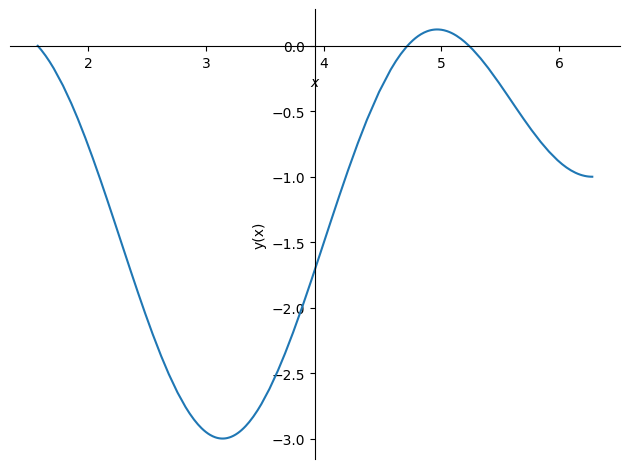

In [2]:
y = Function('y')
de = Eq(diff(y(x),x)+ 2*tan(x)*y(x), sin(x))
y0 = {y(pi/3):0}
x1 = pi
sol = dsolve(de,y(x),ics=y0)
print("The solution of the given DE is:", sol.rhs)
print("The value of y at", x1, "is:", sol.rhs.subs(x,x1))
plot (sol.rhs, (x, pi/2, 2*pi), ylabel="y(x)")

**2. Solving Differnetial Equations using Bernoulli's Equation.**

The solution of the given DE is: -1/(x*(log(x) - 1))
The value of y at 2 is: 1/(2*(1 - log(2)))


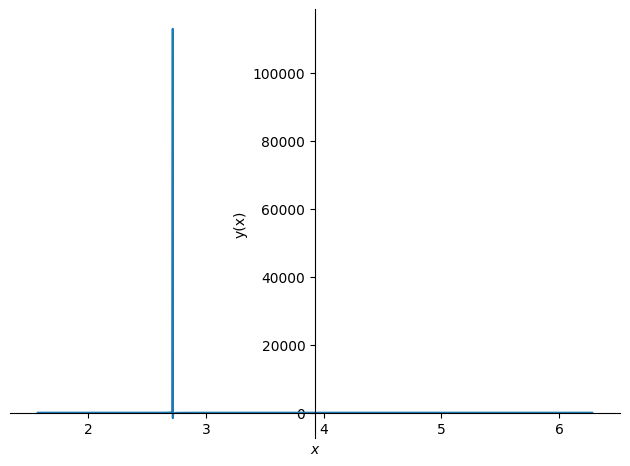

In [3]:
y = Function('y')
de = Eq(diff(y(x),x)+ (1/x)*y(x), y(x)**2)
y0 = {y(1):1}
x1=2
sol = dsolve(de,y(x),ics=y0)
print("The solution of the given DE is:", simplify(sol.rhs))
print("The value of y at", x1, "is:", sol.rhs.subs(x,x1))
plot (simplify(sol.rhs), (x, pi/2, 2*pi), ylabel="y(x)")

**3. Constructing Cayley’s table and testing commutativity for a given finite set.**

In [4]:
def addmod(a,b,n):
    return (a+b)%n
def multmod (a,b,n):
    return (a*b)%n
def cayley(G,n,op):
    print("The cayley table for the group G =",G,"is")
    for i in G:
        for j in G:
            print(op(i,j,n),end="\t")
        print("\n")
def commutative(G,n,op):
    for i in G:
        for j in G:
            if op(i,j,n) != op(j,i,n):
                print("The given operation is not commutative on the set",G)
                return
    print("The given operation is commutative on the set",G)
    return

cayley([0,1,2,3,4,5],6,addmod)
commutative([0,1,2,3,4,5],6,addmod)

The cayley table for the group G = [0, 1, 2, 3, 4, 5] is
0	1	2	3	4	5	

1	2	3	4	5	0	

2	3	4	5	0	1	

3	4	5	0	1	2	

4	5	0	1	2	3	

5	0	1	2	3	4	

The given operation is commutative on the set [0, 1, 2, 3, 4, 5]


**4. a)Checking whether a given subset is a subgroup or not.<br>
    b)Finding the generator of a group.**

In [5]:
def subgroup (H,n,op):
    for i in H:
        for j in H:
            if op=='+':
                if (i+j)%n not in H:
                    print(H,"is not a subgroup of the given group")
                    return
            elif (i*j)%n not in H:
                print (H,"is not a subgroup of the given group")
                return
    print (H,"is a subgroup of the given group")
    return

subgroup ([0,2,4,6,8],10,'+')

def is_cyclic(G,op,n):
    generators=[]
    for i in G:
        if op=='+':
            gtd_i=[(k*i)%n for k in range (1,len(G)+1)]
        else:
            gtd_i=[(i**k)%n for k in range (1,len(G)+1)]
        if set (gtd_i)==set(G):
            generators.append(i)
    if generators==[]:
        print("The group",set(G),"is not cyclic")
    else:
        print("The group",set(G),"is cyclic and the set of generators is",set(generators))

is_cyclic([0,1,2,3,],'+',4)

[0, 2, 4, 6, 8] is a subgroup of the given group
The group {0, 1, 2, 3} is cyclic and the set of generators is {1, 3}


**5. Finding the number of elements of each order in a cylic group.**

In [6]:
def order_of_elements(G,e):
    n = len(G)
    divisors=[]
    for i in range (1,n+1):
        if n%i==0:
            divisors.append(i)
    print("The divisors of",n,"are",divisors)
    for j in divisors:
        ord_j_elts=[]
        for a in G:
            for k in range(1,j+1):
                if (a*k)%n==e and k<j:
                    break
                elif (a*k)%n==e and k==j:
                    print("The order of",a,"is",j)
                    ord_j_elts.append(a)
        print("The number of elements of order",j,"is",len(ord_j_elts))

order_of_elements([0,1,2,3,4,5],0)

The divisors of 6 are [1, 2, 3, 6]
The order of 0 is 1
The number of elements of order 1 is 1
The order of 3 is 2
The number of elements of order 2 is 1
The order of 2 is 3
The order of 4 is 3
The number of elements of order 3 is 2
The order of 1 is 6
The order of 5 is 6
The number of elements of order 6 is 2


**6. Finding the angle between the radius vector and tangent.**

In [7]:
def angle_slope(r,t):
    tanp=(r/r.diff(theta)).subs(theta,t)
    ang=solve(tanp-tan(phi),phi)[0]
    psi=(ang+theta).subs(theta,t)
    print("Angle=",float(ang))
    print("Slope=",tan(psi))

angle_slope(a*(1+sin(theta)),pi/6)

Angle= 1.0471975511965979
Slope= zoo


**7. Finding the arc length of a curve.**

In [8]:
a=2
y=(a**(2/3)-x**(2/3))**(3/2)
u=sqrt(1+diff(y,x)**2)
s=float(4*Integral(u,(x,0,2)))
print("The arc length of given curve is",s)

The arc length of given curve is 12.0


**8. Tracing of standard curves in Cartesian and Polar forms.**

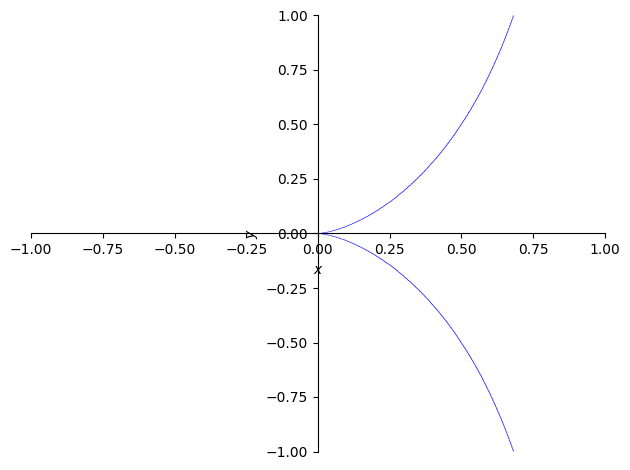

In [9]:
from sympy import var, plot_implicit
var('x y')
a=1
plot_implicit((y**2)*(a-x)-(x**3),(x,-1,1),(y,-1,1))

**9. Computing surface area of revolution**

In [10]:
y=Symbol('y')
x=y**3
arcl= (1+(diff(x,y))**2)**(1/2)
u=float(2*pi*Integral(y**3*arcl,(y,0,2)))
print("The surface area of revolution is = ",u)

The surface area of revolution is =  203.0436015537515


**10. Computing volume of revolution.**

In [11]:
x=Symbol('x')
a,b=2,1
y_sq=b**2*(1-x**2/a**2)
u=float(2*pi*Integral(y_sq,(x,0,a)))
print("The volume of revolution is ",u)

The volume of revolution is  8.377580409572783
